In [54]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [55]:
w,h=1000,1000

blank_image=np.zeros((w,h,3),dtype=np.uint8)

In [56]:
def plt_imshow_bgr(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

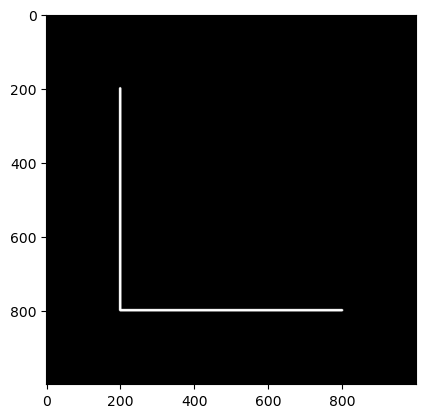

In [57]:
x=200
y=800

pt1=(x,x)
pt2=(x,y)
pt3=(y,y)

img=blank_image.copy()
cv2.line(img,pt1,pt2,(255,255,255),5)
cv2.line(img,pt2,pt3,(255,255,255),5)

plt_imshow_bgr(img)

In [58]:
def find_pts(approx):
    x=np.min(approx)
    y=np.max(approx)
    
    pt1=np.array([x,x])
    pt2=np.array([x,y])
    pt3=np.array([y,y])

    return [pt1,pt2,pt3]

In [59]:
def find_angle(pts:list)->float:
    v1=pts[0]-pts[1]
    v2=pts[1]-pts[2]
    
    theta=np.arccos(np.dot(v1,v2)/(np.sqrt(np.sum(np.square(v1)))*np.sqrt(np.sum(np.square(v1)))))
    theta=np.rad2deg(theta)
    return theta

In [60]:
def pipeline(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    contours,hierarchy=cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    pts=find_pts(contours)
    theta=find_angle(pts)
    cv2.putText(img,f'{theta:.2f}',pts[2],cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    plt_imshow_bgr(img)

In [61]:
from scipy.spatial.transform import Rotation as R

In [109]:
v1=[1,0,0]
v2=[0,1,0]

In [110]:
def find_angle_vector(a,b):
    v1=a[:1]
    v2=b[:1]
    theta=np.arccos(np.dot(v1,v2)/(np.sqrt(np.sum(np.square(v1)))*np.sqrt(np.sum(np.square(v1)))))
    theta=np.rad2deg(theta)
    return theta

In [111]:
V=np.array([v1[:2],v2[:2]])
o=np.zeros_like(V)

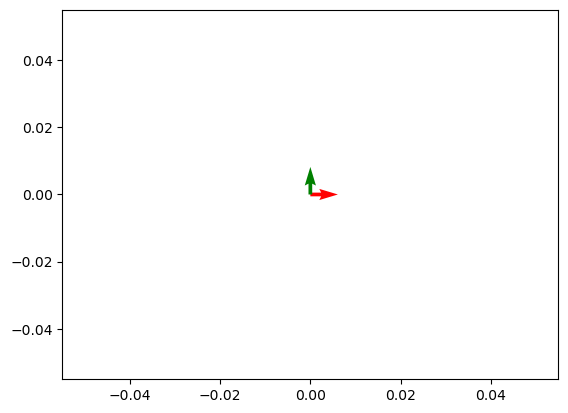

In [115]:
plt.quiver(*o,V[:,0],V[:,1],color=['r','g','b'])
plt.show()

TypeError: from_euler() takes at least 2 positional arguments (0 given)